#### Positional Encodings

In [3]:
import numpy as np

# d: embedding space dimension
def positional_encoding_matrix(seq_len, d, n=10000):
    P = np.zeros((seq_len, d))
    for k in range(seq_len):
        for i in np.arange(int(d/2)):
            denominator = np.power(n, 2*i/d)
            P[k, 2*i] = np.sin(k/denominator)
            P[k, 2*i+1] = np.cos(k/denominator)
    return P

In [4]:
positional_encoding_matrix(4, 4)

array([[ 0.        ,  1.        ,  0.        ,  1.        ],
       [ 0.84147098,  0.54030231,  0.00999983,  0.99995   ],
       [ 0.90929743, -0.41614684,  0.01999867,  0.99980001],
       [ 0.14112001, -0.9899925 ,  0.0299955 ,  0.99955003]])

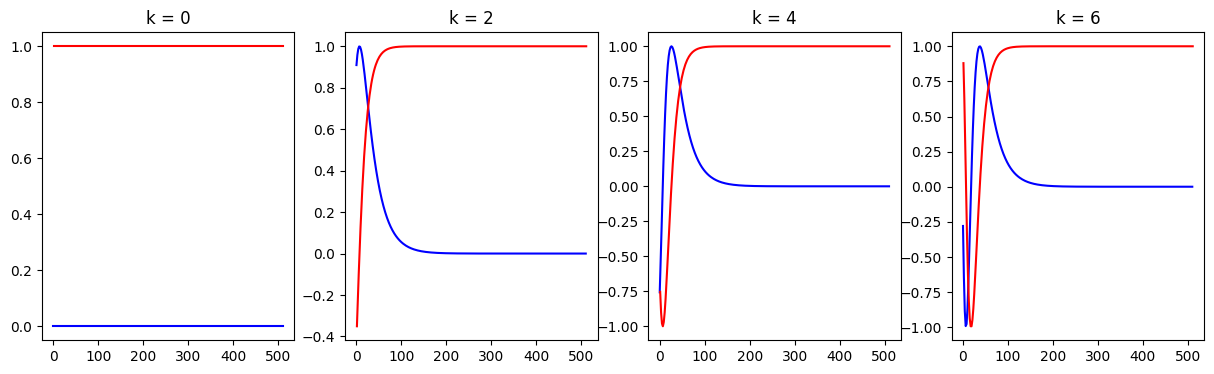

In [31]:
import matplotlib.pyplot as plt

def plot_pos(k, d=512, n=10000):
    x_sin = np.arange(0, 512, 2)
    x_cos = np.arange(1, 512, 2)
    sin_denominator = np.power(n, 2*x_sin/d)
    cos_denominator = np.power(n, 2*x_cos/d)
    y_sin = np.sin(k/sin_denominator)
    y_cos = np.cos(k/cos_denominator)
    plt.plot(x_sin, y_sin, c='blue')
    plt.plot(x_cos, y_cos, c='red')
    plt.title(f'k = {k}')

fig = plt.figure(figsize=(15, 4))

for i in range(4):
    plt.subplot(141 + i)
    plot_pos(i*2)

plt.show()

Text(0, 0.5, 'seq_len')

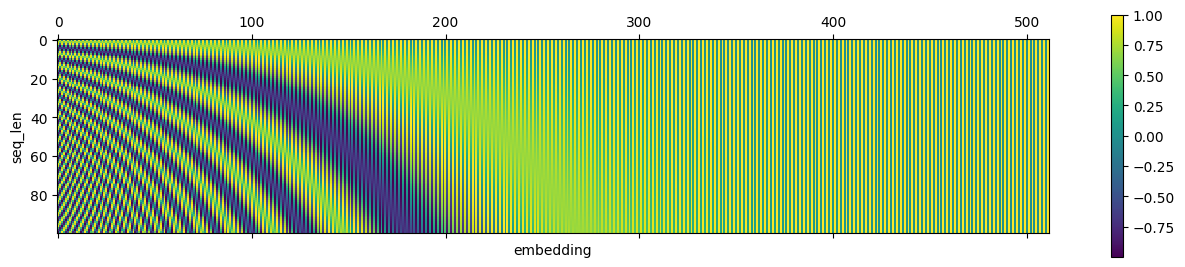

In [18]:
P = positional_encoding_matrix(100, 512)
cax = plt.matshow(P)
plt.gcf().colorbar(cax)
plt.xlabel('embedding')
plt.ylabel('seq_len')